In [7]:
import csv
import os
data_root = "/root/autodl-tmp/data/SnakeCLEF2022-small_size/"
with open('valid_split.csv', 'r') as file:
    reader = csv.DictReader(file)

    # 创建新的csv文件并写入标题行
    with open('new_file.csv', 'w', newline='') as new_file:
        writer = csv.DictWriter(new_file, fieldnames=reader.fieldnames)
        writer.writeheader()

        # 遍历每一行
        for row in reader:
            path = os.path.join(data_root, row['image_path'])
            # 如果image_path存在，则写入新文件
            if os.path.exists(path):
                writer.writerow(row)

In [2]:
!pip install seaborn

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 292 kB 1.9 MB/s eta 0:00:01


In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from PIL import Image
import os 
import matplotlib.pyplot as plt
import torchvision.models as models
from tqdm import tqdm
import seaborn as sns

In [4]:
labels_dataframe = pd.read_csv('./SnakeCLEF2022-Train.csv',header=0)
labels_dataframe.head(7)

/tmp/ipykernel_165/1233495139.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  labels_dataframe = pd.read_csv('./SnakeCLEF2022-Train.csv',header=0)


,observation_id,endemic,binomial_name,code,image_path,class_id,subset
0,2670823,True,Zamenis lineatus,IT,1990/Zamenis_lineatus/3001242.jpg,1779,train
1,70108926,False,Xenoxybelis argenteus,VE,1990/Xenoxybelis_argenteus/113910655.jpg,1772,train
2,70108926,False,Xenoxybelis argenteus,VE,1990/Xenoxybelis_argenteus/113910659.jpg,1772,train
3,117935,False,Aspidelaps lubricus,ZA,1990/Aspidelaps_lubricus/168477.JPG,95,train
4,125284,False,Telescopus beetzi,ZA,1990/Telescopus_beetzi/177365.JPG,1606,train
5,125266,False,Dipsina multimaculata,unknown,1990/Dipsina_multimaculata/177336.JPG,561,train
6,125267,False,Dasypeltis scabra,unknown,1990/Dasypeltis_scabra/177337.JPG,469,train


In [5]:
labels_dataframe.describe()

,observation_id,class_id
count,1.822610e+05,182261.000000
mean,6.847235e+07,916.810075
std,4.746983e+07,501.765136
min,1.233000e+03,0.000000
25%,2.474007e+07,457.000000
50%,6.721523e+07,913.000000
75%,1.093612e+08,1330.000000
max,1.478688e+08,1783.000000


/tmp/ipykernel_306/4120913242.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SnakeCLEF2022-Train.csv')


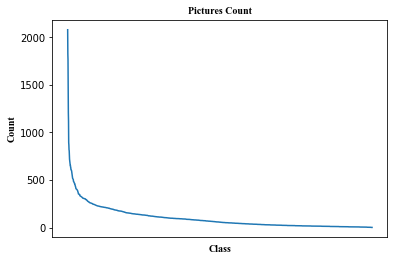

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 设置使用的字体为Times New Roman
font_path = 'TIMESBD.TTF'  # 将 'path_to_times_new_roman.ttf' 替换为你Times New Roman字体文件的路径
font_prop = font_manager.FontProperties(fname=font_path)

df = pd.read_csv('SnakeCLEF2022-Train.csv')
count = df['class_id'].value_counts().sort_values(ascending=False)

plt.plot(count.values)
plt.ylabel('Count', fontproperties=font_prop)  # 设置y轴字体为Times New Roman
plt.xlabel('Class', fontproperties=font_prop)  # 设置x轴标题字体为Times New Roman
plt.title('Pictures Count', fontproperties=font_prop)  # 设置标题字体为Times New Roman

plt.xticks([])  # 隐藏x轴刻度标签

plt.savefig('chart.svg', format='svg')
plt.show()